In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification

In [3]:
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)
# n_sample =2000 records 
# N_features =20 (default)
# n_classes = 2 (0 and 1)
# wegiht= balancing purpose


In [4]:
X.shape

(2000, 20)

In [6]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=1)

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
# train
y_train_pred=rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
# test
y_test_pred=rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9853000000000001


# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
# train
y_train_pred=lr_model.predict_proba(X_train)
print('LR train roc-auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
# test
y_test_pred=lr_model.predict_proba(X_test)
print('LF test roc-auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

LR train roc-auc: 0.9863568922694498
LF test roc-auc: 0.9885777777777777


# Adaboost Classifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
# train
y_train_pred=ada_model.predict_proba(X_train)
print('ada train roc-auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
# test
y_test_pred=rf_model.predict_proba(X_test)
print('ada test roc-auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

ada train roc-auc: 0.9975081174960356
ada test roc-auc: 0.9853000000000001


# KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
# train
y_train_pred=knn_model.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
# test
y_test_pred=lr_model.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

KNN train roc-auc: 0.981670071491109
KNN test roc-auc: 0.9885777777777777


In [35]:
pred=[]
for model in [rf_model,lr_model,ada_model,knn_model]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9852777777777777


In [36]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,1.00,0.966929,0.538202,0.8
3,0.95,0.761539,0.509875,0.8
4,0.59,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,0.98,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [37]:
final_prediction

0      0.882762
1      0.118323
2      0.826283
3      0.755353
4      0.564947
         ...   
595    0.121340
596    0.115345
597    0.874197
598    0.160717
599    0.837357
Length: 600, dtype: float64

In [39]:
# calculate the ROC curve
fpr,tpr,thresolds=roc_curve(y_test,final_prediction)

In [50]:
fpr

array([0.        , 0.        , 0.        , 0.00333333, 0.00333333,
       0.01      , 0.01      , 0.01333333, 0.01333333, 0.01666667,
       0.01666667, 0.02      , 0.02      , 0.02333333, 0.02333333,
       0.02666667, 0.02666667, 0.03666667, 0.03666667, 0.04      ,
       0.04      , 0.05      , 0.05      , 0.05333333, 0.05333333,
       0.05666667, 0.05666667, 0.09333333, 0.09333333, 0.10666667,
       0.10666667, 0.23      , 0.23      , 0.25666667, 0.25666667,
       0.30333333, 0.30333333, 0.61333333, 0.61333333, 1.        ])

In [40]:
thresolds

array([1.91188114, 0.91188114, 0.9059413 , 0.90577475, 0.80054608,
       0.7980558 , 0.77887064, 0.77821156, 0.7583411 , 0.75787124,
       0.72479835, 0.72387362, 0.70201656, 0.70143711, 0.67268151,
       0.66993537, 0.59577749, 0.59050386, 0.58896627, 0.58425354,
       0.55838469, 0.54639283, 0.53605932, 0.48866892, 0.46740225,
       0.46472765, 0.4446034 , 0.38475652, 0.38379719, 0.35433098,
       0.34836612, 0.23719741, 0.23640421, 0.22630678, 0.22396893,
       0.20602808, 0.20348417, 0.12570026, 0.1253351 , 0.10498954])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in thresolds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred, normalize=True))
    
accuracy_ls =pd.concat([pd.Series(thresolds),pd.Series(accuracy_ls)],axis=1)

accuracy_ls.columns = ['thresolds','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresolds,accuracy
26,0.444603,0.960000
25,0.464728,0.958333
23,0.488669,0.958333
24,0.467402,0.956667
22,0.536059,0.956667


In [51]:
# ROC plot
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

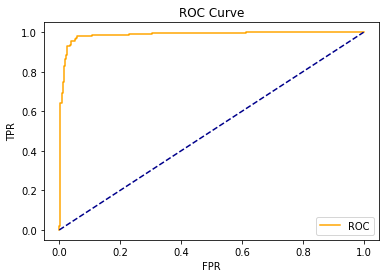

In [52]:
plot_roc_curve(fpr,tpr)